In [1]:
import findspark
findspark.init()
findspark.find()
import pyspark
from pyspark import SparkContext

In [17]:
import pandas as pd

## Spark Conext
 SparkContext is the entry point and the core component responsible for coordinating the execution of Spark jobs across a cluster.

In [2]:
sc = SparkContext(master='local',appName='test-app')
sc

<SparkContext master=local appName=test-app>

In [3]:
rdd = sc.parallelize([1,2,3,4,5,6,7,8,9,10,11,12])
type(rdd)

pyspark.rdd.RDD

In [4]:
rdd.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [5]:
rdd.map(lambda x:x*x).collect()

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144]

In [6]:
sc.stop()

## SparkSession
The SparkSession includes a built-in SparkContext, and it provides additional functionality, including support for DataFrames and Dataset APIs, Spark SQL, and Spark's built-in functions.

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('TextClassification').getOrCreate()

In [8]:
spark

In [9]:
# https://github.com/Jcharis/pyspark-tutorials/blob/main/Text_Classification_with_PySpark/data/udemy_courses_clean.csv
df = spark.read.csv('udemy_courses_clean.csv',header=True,inferSchema=True)
df.show()

+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|_c0|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration| published_timestamp|         subject|  clean_course_title|
+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|  0|  1070968|Ultimate Investme...|https://www.udemy...|   True|  200|           2147|         23|          51|        All Levels|       1.5 hours|2017-01-18T20:58:58Z|Business Finance|Ultimate Investme...|
|  1|  1113822|Complete GST Cour...|https://www.udemy...|   True|   75|           2792|        923|         274|        All Levels|        39 hours|2017-03-09T16:34:20Z

In [10]:
df.columns

['_c0',
 'course_id',
 'course_title',
 'url',
 'is_paid',
 'price',
 'num_subscribers',
 'num_reviews',
 'num_lectures',
 'level',
 'content_duration',
 'published_timestamp',
 'subject',
 'clean_course_title']

In [11]:
df1 = df.select('course_title','subject')
df1.show(5)

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
+--------------------+----------------+
only showing top 5 rows



In [12]:
df1.groupBy('subject').count().show()

+--------------------+-----+
|             subject|count|
+--------------------+-----+
|play Electric Gui...|    1|
|Multiply returns ...|    1|
|                null|    6|
|    Business Finance| 1198|
|Introduction Guit...|    1|
|Learn Play Fernan...|    1|
|      Graphic Design|  603|
|Aprende tocar el ...|    1|
|     Web Development| 1200|
|Learn Classical G...|    1|
| Musical Instruments|  676|
+--------------------+-----+



In [13]:
# df1.toPandas()
df1.printSchema()

root
 |-- course_title: string (nullable = true)
 |-- subject: string (nullable = true)



In [18]:
df1.toPandas()

,course_title,subject
0,Ultimate Investment Banking Course,Business Finance
1,Complete GST Course & Certification - Grow You...,Business Finance
2,Financial Modeling for Business Analysts and C...,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,Business Finance
4,How To Maximize Your Profits Trading Options,Business Finance
...,...,...
3684,Learn jQuery from Scratch - Master of JavaScri...,Web Development
3685,How To Design A WordPress Website With No Codi...,Web Development
3686,Learn and Build using Polymer,Web Development
3687,CSS Animations: Create Amazing Effects on Your...,Web Development


In [19]:
df1.describe().show()

+-------+---------------------------------+--------------------+
|summary|                     course_title|             subject|
+-------+---------------------------------+--------------------+
|  count|                             3689|                3683|
|   mean|                             null|                null|
| stddev|                             null|                null|
|    min|             #1 Piano Hand Coo...|Aprende tocar el ...|
|    max|７日でマスター  ビギナー向け A...|play Electric Gui...|
+-------+---------------------------------+--------------------+



In [15]:
def shape(df):
    print('(',df.count() ,',', len(df.columns),')')

shape(df1)

( 3689 , 2 )


In [16]:
df2 = df1.dropna(subset='subject')
shape(df2)

( 3683 , 2 )


## Machine Learning
Tokenization -> stopwords remover -> CountVectorizer -> IDF -> LogisticRegression 

In [21]:
import pyspark.ml.feature

In [22]:
dir(pyspark.ml.feature)

['Any',
 'Binarizer',
 'BucketedRandomProjectionLSH',
 'BucketedRandomProjectionLSHModel',
 'Bucketizer',
 'ChiSqSelector',
 'ChiSqSelectorModel',
 'CountVectorizer',
 'CountVectorizerModel',
 'DCT',
 'DataFrame',
 'DenseMatrix',
 'DenseVector',
 'Dict',
 'ElementwiseProduct',
 'FeatureHasher',
 'Generic',
 'HasFeaturesCol',
 'HasHandleInvalid',
 'HasInputCol',
 'HasInputCols',
 'HasLabelCol',
 'HasMaxIter',
 'HasNumFeatures',
 'HasOutputCol',
 'HasOutputCols',
 'HasRelativeError',
 'HasSeed',
 'HasStepSize',
 'HasThreshold',
 'HasThresholds',
 'HashingTF',
 'IDF',
 'IDFModel',
 'Imputer',
 'ImputerModel',
 'IndexToString',
 'Interaction',
 'JM',
 'JavaEstimator',
 'JavaMLReadable',
 'JavaMLWritable',
 'JavaModel',
 'JavaParams',
 'JavaTransformer',
 'List',
 'MaxAbsScaler',
 'MaxAbsScalerModel',
 'MinHashLSH',
 'MinHashLSHModel',
 'MinMaxScaler',
 'MinMaxScalerModel',
 'NGram',
 'Normalizer',
 'OneHotEncoder',
 'OneHotEncoderModel',
 'Optional',
 'P',
 'PCA',
 'PCAModel',
 'Param',
 '

In [23]:
from pyspark.ml.feature import Tokenizer,StopWordsRemover, CountVectorizer, IDF
from pyspark.ml.feature import StringIndexer

In [110]:
df2.show(2,truncate=False)

+-----------------------------------------------------------+----------------+
|course_title                                               |subject         |
+-----------------------------------------------------------+----------------+
|Ultimate Investment Banking Course                         |Business Finance|
|Complete GST Course & Certification - Grow Your CA Practice|Business Finance|
+-----------------------------------------------------------+----------------+
only showing top 2 rows



In [109]:
df2.groupBy('subject').count().show()

+--------------------+-----+
|             subject|count|
+--------------------+-----+
|play Electric Gui...|    1|
|Multiply returns ...|    1|
|    Business Finance| 1198|
|Introduction Guit...|    1|
|Learn Play Fernan...|    1|
|      Graphic Design|  603|
|Aprende tocar el ...|    1|
|     Web Development| 1200|
|Learn Classical G...|    1|
| Musical Instruments|  676|
+--------------------+-----+



In [30]:
df2.groupBy('subject').count().filter('count != 1').show()

+-------------------+-----+
|            subject|count|
+-------------------+-----+
|   Business Finance| 1198|
|     Graphic Design|  603|
|    Web Development| 1200|
|Musical Instruments|  676|
+-------------------+-----+



In [31]:
df2.groupBy('subject').count().filter('count != 1').select('subject').show()

+-------------------+
|            subject|
+-------------------+
|   Business Finance|
|     Graphic Design|
|    Web Development|
|Musical Instruments|
+-------------------+



In [32]:
df2.groupBy('subject').count().filter('count != 1').select('subject')

DataFrame[subject: string]

In [33]:
from pyspark.sql.functions import col

df3 = df2.filter(col("subject").isin(['Web Development','Graphic Design','Business Finance','Musical Instruments']))

In [34]:
shape(df2)

( 3683 , 2 )


In [35]:
shape(df3)

( 3677 , 2 )


In [36]:
df3.groupBy('subject').count().show()

+-------------------+-----+
|            subject|count|
+-------------------+-----+
|   Business Finance| 1198|
|     Graphic Design|  603|
|    Web Development| 1200|
|Musical Instruments|  676|
+-------------------+-----+



In [40]:
type(df3)

pyspark.sql.dataframe.DataFrame

### Pipeline
- Tokenize the text: Convert the text into individual tokens (words).
- Apply CountVectorizer: Convert the tokens into numerical vectors representing the word occurrences in each document.
- Apply IDF: Transform the CountVectorizer output into TF-IDF (Term Frequency-Inverse Document Frequency) vectors.

In [42]:
tokenizer = Tokenizer(inputCol="course_title" , outputCol="tokens")
tokenizer.transform(df3).show()

+--------------------+----------------+--------------------+
|        course_title|         subject|              tokens|
+--------------------+----------------+--------------------+
|Ultimate Investme...|Business Finance|[ultimate, invest...|
|Complete GST Cour...|Business Finance|[complete, gst, c...|
|Financial Modelin...|Business Finance|[financial, model...|
|Beginner to Pro -...|Business Finance|[beginner, to, pr...|
|How To Maximize Y...|Business Finance|[how, to, maximiz...|
|Trading Penny Sto...|Business Finance|[trading, penny, ...|
|Investing And Tra...|Business Finance|[investing, and, ...|
|Trading Stock Cha...|Business Finance|[trading, stock, ...|
|Options Trading 3...|Business Finance|[options, trading...|
|The Only Investme...|Business Finance|[the, only, inves...|
|Forex Trading Sec...|Business Finance|[forex, trading, ...|
|Trading Options W...|Business Finance|[trading, options...|
|Financial Managem...|Business Finance|[financial, manag...|
|Forex Trading Cou...|Bu

In [45]:
tokenizer = Tokenizer(inputCol="course_title" , outputCol="tokens")
stopwords_remove = StopWordsRemover(inputCol="tokens",outputCol="filtred_tokens")
vectorizer = CountVectorizer(inputCol="filtred_tokens",outputCol="vectors")
idf = IDF(inputCol="vectors",outputCol="tfidf_vectors")

In [58]:
labelEncoder = StringIndexer(inputCol="subject",outputCol="label").fit(df3)
labelEncoder.transform(df3).groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0| 1200|
|  1.0| 1198|
|  3.0|  603|
|  2.0|  676|
+-----+-----+



In [52]:
labelEncoder.labels

['Web Development',
 'Business Finance',
 'Musical Instruments',
 'Graphic Design']

In [59]:
df4 = labelEncoder.transform(df3)
df4.show(5)

+--------------------+----------------+-----+
|        course_title|         subject|label|
+--------------------+----------------+-----+
|Ultimate Investme...|Business Finance|  1.0|
|Complete GST Cour...|Business Finance|  1.0|
|Financial Modelin...|Business Finance|  1.0|
|Beginner to Pro -...|Business Finance|  1.0|
|How To Maximize Y...|Business Finance|  1.0|
+--------------------+----------------+-----+
only showing top 5 rows



In [76]:
# split dataset
(df4_train , df4_test) = df4.randomSplit((0.7,0.3))

In [77]:
shape(df4) , shape(df4_train)  ,  shape(df4_test)

( 3677 , 3 )
( 2575 , 3 )
( 1102 , 3 )


(None, None, None)

### Model

In [78]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.pipeline import Pipeline

In [79]:
tokenizer = Tokenizer(inputCol="course_title" , outputCol="tokens")
stopwords_remove = StopWordsRemover(inputCol="tokens",outputCol="filtred_tokens")
vectorizer = CountVectorizer(inputCol="filtred_tokens",outputCol="vectors")
idf = IDF(inputCol="vectors",outputCol="tfidf_vectors")
lr = LogisticRegression(featuresCol="tfidf_vectors" , labelCol="label")

pipeline = Pipeline(stages=[tokenizer,stopwords_remove,vectorizer,idf, lr])
pipeline

Pipeline_bb66d9c3d862

In [81]:
model = pipeline.fit(df4_train)
model

PipelineModel_b00624807cbe

In [84]:
predictions = model.transform(df4_test)
predictions.select(['course_title','subject','label','tfidf_vectors','rawPrediction','probability','prediction']).show()

+--------------------+-------------------+-----+--------------------+--------------------+--------------------+----------+
|        course_title|            subject|label|       tfidf_vectors|       rawPrediction|         probability|prediction|
+--------------------+-------------------+-----+--------------------+--------------------+--------------------+----------+
|#10 Hand Coordina...|Musical Instruments|  2.0|(3632,[0,4,304,32...|[-7.8409562446138...|[9.06327355030474...|       2.0|
|#4 Piano Hand Coo...|Musical Instruments|  2.0|(3632,[11,43,172,...|[-15.411165730635...|[1.75264458680651...|       2.0|
|1 - Concepts of S...|   Business Finance|  1.0|(3632,[0,3,38,79,...|[7.53314092984721...|[0.98934600423680...|       0.0|
|4 Week Rhythm Mas...|Musical Instruments|  2.0|(3632,[60,213,306...|[4.08226013767878...|[0.68779413303885...|       0.0|
|48 Logo Designs a...|     Graphic Design|  3.0|(3632,[54,125,405...|[-10.543906142554...|[3.01621709496620...|       3.0|
|6 Must Know Tri

### Metrics

In [86]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator as MCE

In [89]:
evaluator = MCE(predictionCol="prediction", labelCol="label", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
accuracy

0.9310344827586207

In [90]:
from pyspark.mllib.evaluation import MulticlassMetrics # it word with rdd

In [101]:
metrics = MulticlassMetrics(predictions['label','prediction'].rdd)
print('accuracy :',metrics.accuracy)
print('precision :',metrics.precision(1.0))
print('recall :',metrics.recall(1.0))
print('f-score :',metrics.fMeasure(1.0))

accuracy : 0.9310344827586207
precision : 0.9690140845070423
recall : 0.884318766066838
f-score : 0.924731182795699


In [104]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn

y_true = predictions.select('label').toPandas()
y_pred = predictions.select('prediction').toPandas()
cm = confusion_matrix(y_true , y_pred)
cm

array([[338,  11,   0,   9],
       [  5, 344,   2,   4],
       [  2,  12, 192,   2],
       [  6,  22,   1, 152]], dtype=int64)

<Axes: >

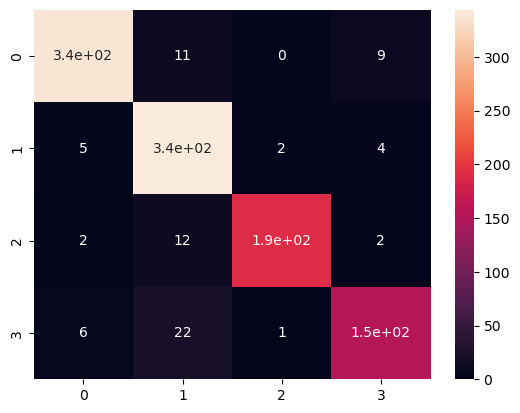

In [106]:
sn.heatmap(cm,annot=True)

### Predictions

In [122]:
from pyspark.sql.types import StringType

data = ['Learn python for machine learning']
cols = ['course_titel']
exl = spark.createDataFrame(data.StringType(),cols)
exl

AttributeError: 'str' object has no attribute 'StringType'